<a href="https://colab.research.google.com/github/MirandaCR/TEC/blob/main/Avance_4_Equipo20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




<div align="left">
  <img src="https://brandemia.org/sites/default/files/sites/default/files/tec_monterrey_nuevo_logo.png" width="500" height="300">
</div>

# **Proyecto Integrador**


## Integrantes:
 <ul>
      <li>Alfonso Garibay</li>
      <li>Cristian Miranda</li>
       <li>Jaik Yocks</li>
 </ul>


In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar los datos
file_path = '/content/Dataset.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# Codificar la variable objetivo 'SELECCIONADO'
label_encoder = LabelEncoder()
df['SELECCIONADO'] = label_encoder.fit_transform(df['SELECCIONADO'])

# Preparar el conjunto de características y la variable objetivo
X = df.drop(columns=['SELECCIONADO'])
y = df['SELECCIONADO']

# Convertir las columnas categóricas a variables numéricas mediante One-Hot Encoding
X = pd.get_dummies(X)

In [ ]:
# Verificar el balance de clases
print(y.value_counts())

SELECCIONADO
1    68
0    28
2     1
Name: count, dtype: int64


In [ ]:
# Balancear las clases usando RandomOverSampler y luego SMOTE
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_over, y_over = oversample.fit_resample(X, y)
smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_over, y_over)

In [ ]:
# Verificar nuevamente el balance de clases
print(y_resampled.value_counts())

SELECCIONADO
1    68
0    68
2    68
Name: count, dtype: int64


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Escalar las características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Inicializar los modelos con hiperparámetros definidos manualmente
models = {
    'Logistic Regression': LogisticRegression(C=1.0, solver='liblinear', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'Support Vector Machine': SVC(C=1.0, kernel='rbf', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

In [ ]:
# Entrenar y evaluar los modelos con validación cruzada estratificada
model_results = {}
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for model_name, model in models.items():
    start_time = time.time()
    cv_scores = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    end_time = time.time()

    model_results[model_name] = {
        'Cross-Validated Accuracy': np.mean(cv_scores),
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob),
        'Training Time': end_time - start_time
    }

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
# Convertir los resultados a un DataFrame para mejor visualización
model_results_df = pd.DataFrame(model_results).T
print(model_results_df)

                        Cross-Validated Accuracy  Test Accuracy  Precision  \
Logistic Regression                     0.660000           0.75   0.875000   
Decision Tree                           0.754167           0.85   1.000000   
Random Forest                           0.832500           0.80   0.882353   
Gradient Boosting                       0.780000           0.85   1.000000   
Support Vector Machine                  0.754167           0.80   0.882353   
K-Nearest Neighbors                     0.728333           0.70   0.823529   

                          Recall  F1 Score   ROC AUC  Training Time  
Logistic Regression     0.823529  0.848485  0.784314       0.054733  
Decision Tree           0.823529  0.903226  0.911765       0.022690  
Random Forest           0.882353  0.882353  0.901961       1.757393  
Gradient Boosting       0.823529  0.903226  0.882353       2.823138  
Support Vector Machine  0.882353  0.882353  0.666667       0.146261  
K-Nearest Neighbors     0.823529 

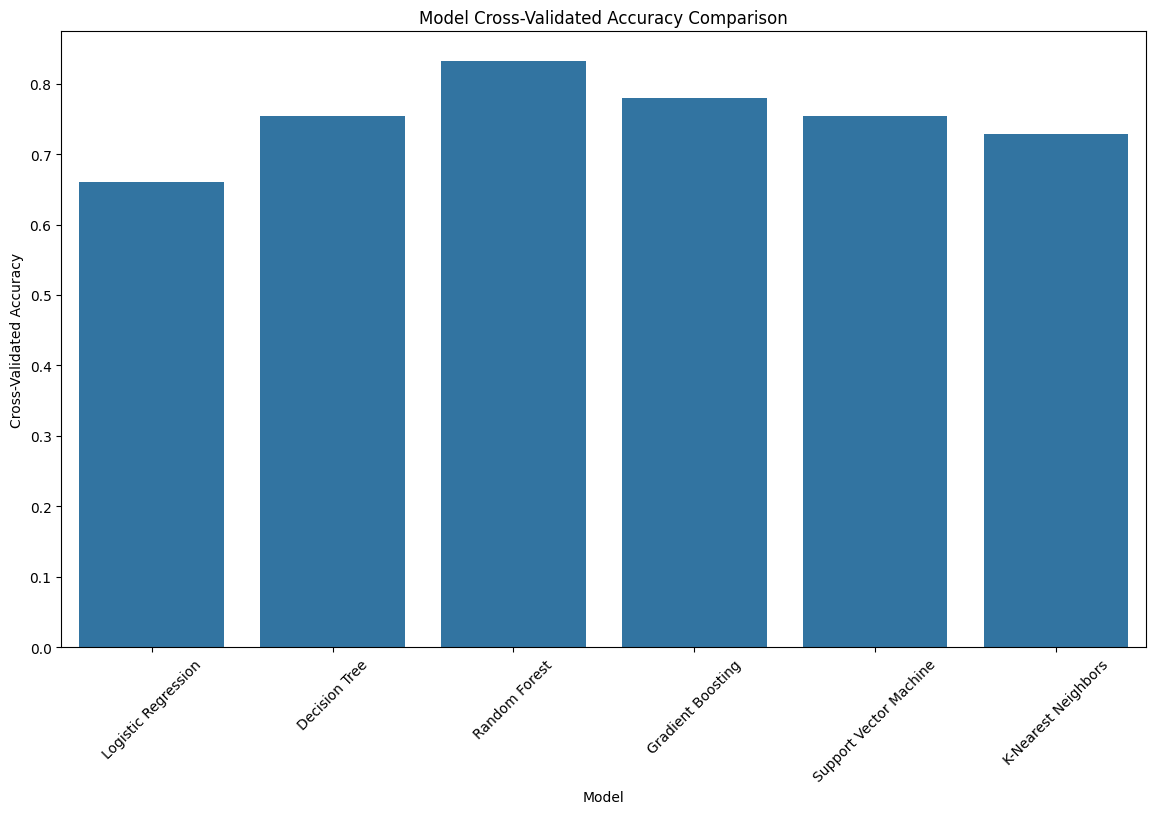

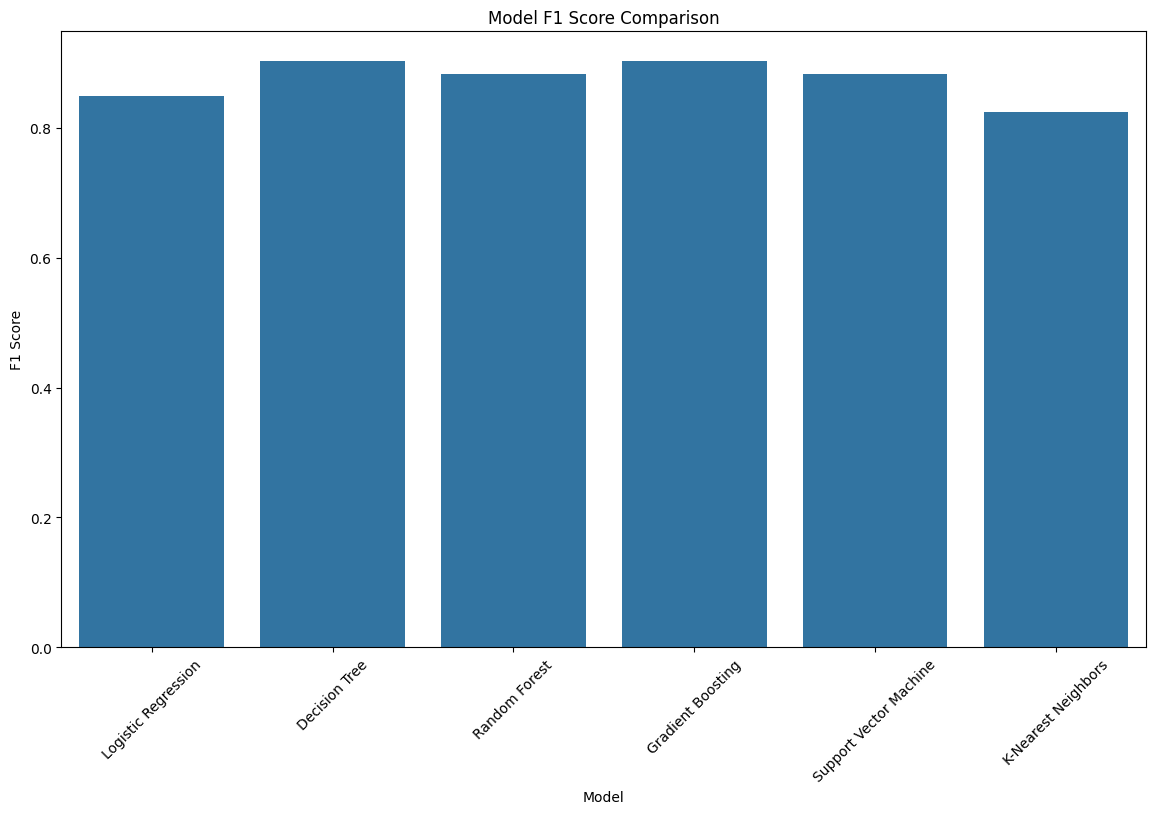

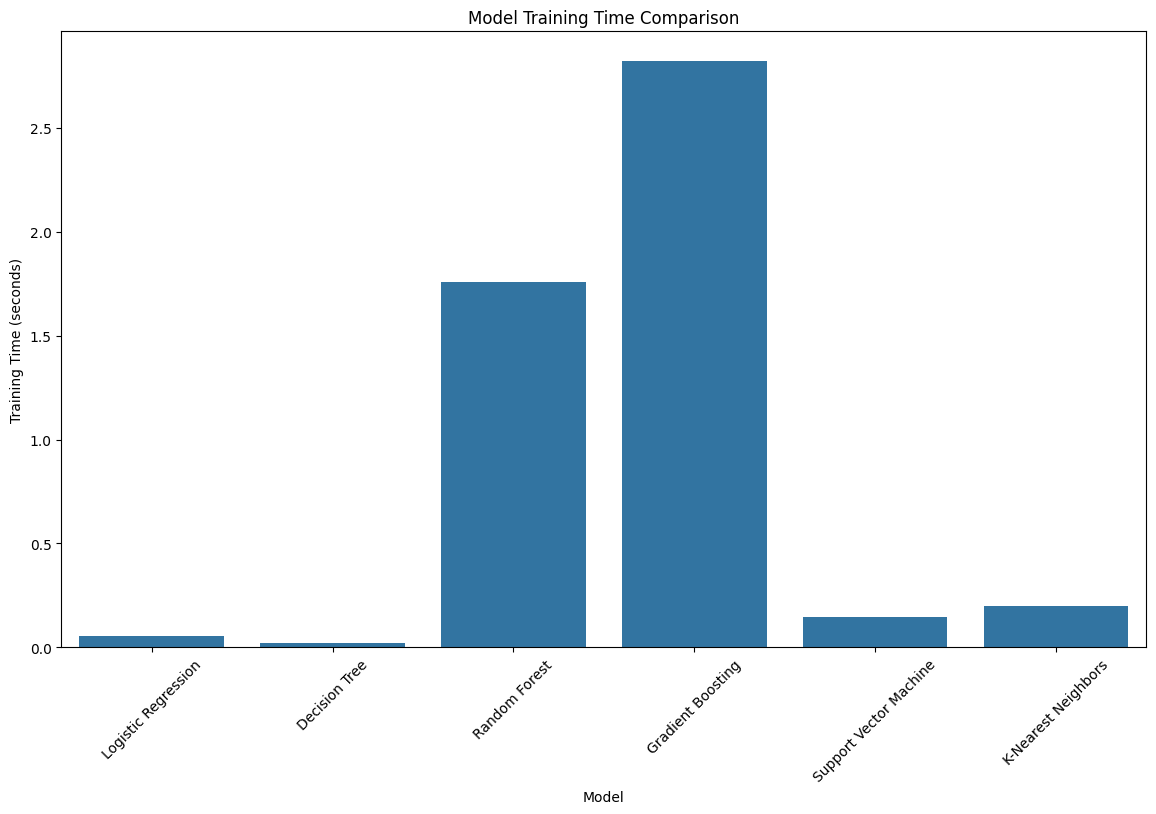

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(14, 8))
sns.barplot(x=model_results_df.index, y='Cross-Validated Accuracy', data=model_results_df)
plt.title('Model Cross-Validated Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=model_results_df.index, y='F1 Score', data=model_results_df)
plt.title('Model F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=model_results_df.index, y='Training Time', data=model_results_df)
plt.title('Model Training Time Comparison')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Seleccionar los dos mejores modelos basados en Cross-Validated Accuracy
top_models = model_results_df.nlargest(2, 'Cross-Validated Accuracy')
print(f"Top models:\n{top_models}")


Top models:
                   Cross-Validated Accuracy  Test Accuracy  Precision  \
Random Forest                        0.8325           0.80   0.882353   
Gradient Boosting                    0.7800           0.85   1.000000   

                     Recall  F1 Score   ROC AUC  Training Time  
Random Forest      0.882353  0.882353  0.901961       1.757393  
Gradient Boosting  0.823529  0.903226  0.882353       2.823138  


In [ ]:
# Definir los hiperparámetros para la búsqueda más exhaustiva utilizando RandomizedSearchCV
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [5, 10, 15, 20, 25, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    }
}

In [ ]:
# Ajuste de hiperparámetros para los dos mejores modelos
best_models = {}
for model_name in top_models.index:
    randomized_search = RandomizedSearchCV(models[model_name], param_grid[model_name], scoring='accuracy', cv=5, n_iter=100, n_jobs=-1, random_state=42)
    randomized_search.fit(X_train, y_train)
    best_models[model_name] = randomized_search.best_estimator_
    print(f"Best parameters for {model_name}: {randomized_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 6, 'learning_rate': 0.2}


In [ ]:
# Evaluar el mejor modelo
final_model_name, final_model = sorted(best_models.items(), key=lambda x: model_results[x[0]]['Cross-Validated Accuracy'], reverse=True)[0]
y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:, 1] if hasattr(final_model, "predict_proba") else final_model.decision_function(X_test)
final_performance = {
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'Precision': precision_score(y_test, y_pred_final),
    'Recall': recall_score(y_test, y_pred_final),
    'F1 Score': f1_score(y_test, y_pred_final),
    'ROC AUC': roc_auc_score(y_test, y_prob_final)
}

In [ ]:
print(f"Final model: {final_model_name} - Performance: {final_performance}")
print(classification_report(y_test, y_pred_final))

Final model: Random Forest - Performance: {'Accuracy': 0.8, 'Precision': 0.8823529411764706, 'Recall': 0.8823529411764706, 'F1 Score': 0.8823529411764706, 'ROC AUC': 0.8823529411764706}
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.88      0.88      0.88        17

    accuracy                           0.80        20
   macro avg       0.61      0.61      0.61        20
weighted avg       0.80      0.80      0.80        20



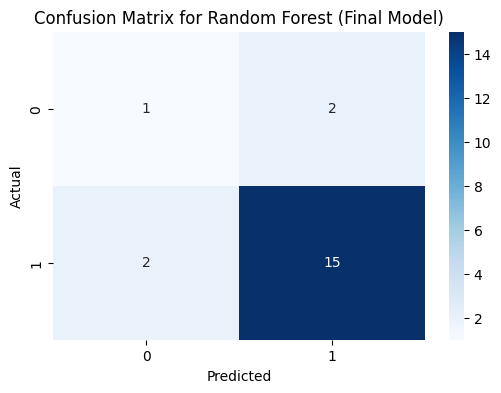

In [ ]:
# Matriz de Confusión del mejor modelo
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,4))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {final_model_name} (Final Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

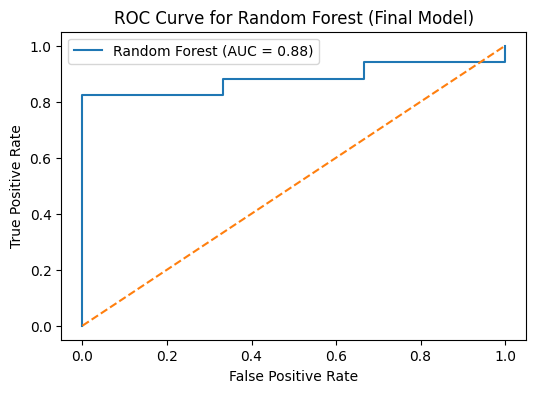

In [ ]:
# Curva ROC del mejor modelo
fpr_final, tpr_final, _final = roc_curve(y_test, y_prob_final)
plt.figure(figsize=(6,4))
plt.plot(fpr_final, tpr_final, label=f'{final_model_name} (AUC = {final_performance["ROC AUC"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {final_model_name} (Final Model)')
plt.legend()
plt.show()

### **Modelo Individual**

La selección del modelo de Random Forest obedece a distintos criterios que se explican a continuación..

Si bien tanto Random Forest como Gradient Boosting lograron una precisión de prueba similar (80% frente a 85%), Random Forest tiene una precisión de validación cruzada más alta (83,25% frente a 78%). La validación cruzada proporciona una estimación más sólida de la generalización del modelo, lo que convierte a Random Forest en una opción preferible.

Ambos modelos tienen el mismo ROC AUC (0,8823), lo que indica un rendimiento similar en la clasificación de casos positivos y negativos.

Random Forest generalmente ofrece una mejor interpretabilidad en comparación con Gradient Boosting. Esto resultar ser beneficioso ya se busca explicar a personas de alto mando en el banco cómo llega el modelo a sus predicciones.

Random Forest tiene un tiempo de entrenamiento más corto (1,76 segundos) en comparación con Gradient Boosting (2,82 segundos). Este puede es un factor decisivo ya que el tiempo de formación es una limitación.

En general, Random Forest parece una opción razonable como modelo final considerando su mayor precisión de validación cruzada, su interpretabilidad potencialmente mejor y su tiempo de entrenamiento más rápido.

  Por último, se debe tener en cuenta que el informe de clasificación muestra una distribución de clases desequilibrada (3 positivas y 17 negativas). Esto podría afectar las métricas de rendimiento, particularmente la precisión y la recuperación. Adicionalmente, el numero de observaciones es baja por lo que el modelo puede no ser tan adecuado a la hora de considerar datos nuevos por lo que se debe tener cuidado en la utilización de este modelo.